# Homework 2: Linear Regression

### Name: Saetbyeol Choi

#  Create a multivariate linear regression model

In [78]:
import pandas as pd
import numpy as np

In [79]:
train = pd.read_csv('concrete_strength_train.csv')
train.head()

,Batch,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,0,148.0,175.0,0.0,171.0,2.0,1000.0,828.0,28,26.92
1,1,446.0,24.0,79.0,162.0,11.6,967.0,712.0,7,52.01
2,2,250.0,0.0,95.7,191.8,5.3,948.9,857.2,3,8.49
3,3,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,14,33.09
4,4,222.4,0.0,96.7,189.3,4.5,967.1,870.3,3,11.58


In [80]:
import statsmodels.api as sm

#define response variable
train_y = train['Compressive Strength']

#define explanatory variable
train_x = train.loc[:,'Cement':'Age']
#Ones = pd.DataFrame(np.repeat(1, (len(train_x))))
#train_x = Ones.join(train_x, how='left')

#add constant to predictor variables
train_x = sm.add_constant(train_x)

#fit linear regression model
lrmodel = sm.OLS(train_y, train_x).fit()

#view model summary
print(lrmodel.summary())

                             OLS Regression Results                             
Dep. Variable:     Compressive Strength   R-squared:                       0.632
Model:                              OLS   Adj. R-squared:                  0.628
Method:                   Least Squares   F-statistic:                     148.4
Date:                  Sat, 29 Oct 2022   Prob (F-statistic):          1.60e-144
Time:                          14:35:10   Log-Likelihood:                -2619.7
No. Observations:                   700   AIC:                             5257.
Df Residuals:                       691   BIC:                             5298.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

## Show the weights

In [81]:
# Show the weights; model is defined by coefficients, w=(w0,...,wd)
print(lrmodel.params)

const                -21.257357
Cement                 0.121380
Blast Furnace Slag     0.107032
Fly Ash                0.090318
Water                 -0.172285
Superplasticizer       0.213922
Coarse Aggregate       0.019804
Fine Aggregate         0.020035
Age                    0.116517
dtype: float64


## How well would you say your model works?

Because R-squared always increases as you add more predictors to a model, the adjusted R-squared can tell you how useful a model is, adjusted for the number of predictors in a model.

The model has an explanatory power of about 63% with r-squared number of 0.628. It indicates that the ingredients can explain the y value (Compressive Strength) by 63% and they can be explained by this model.

The materials that have the least effect on compressive strength are Coarse Aggregate and Fine Aggregate. Their coefficient values are close to 0. Also The corresponding p-value are 0.098 and 0.129 repectively, which is not statistically significant at an alpha level of 0.05.
Superplasticizer's coefficient has the largest value and this ingredient afftects the strength most, but Superplasticizer is not statistically significant because its p-value (0.059) is greater than the usual significance level of 0.05.

## Predictions

In [82]:
test = pd.read_csv('concrete_strength_test.csv')

test_x = test.loc[:,'Cement':'Age']
test_x = sm.add_constant(test_x)

y_predict = lrmodel.predict(test_x)
y_predict

0      27.802085
1      28.718484
2      53.359227
3      26.633721
4      22.398914
         ...    
295    52.261549
296    51.280214
297    13.985848
298    31.124524
299    20.013366
Length: 300, dtype: float64

In [83]:
true_y = pd.read_csv('y_concrete_strength_test.csv')
true_y = true_y['Compressive Strength']
true_y

0      26.97
1      26.15
2      39.30
3      22.72
4      27.04
       ...  
295    59.89
296    25.20
297    10.22
298    15.36
299    22.14
Name: Compressive Strength, Length: 300, dtype: float64

# Make a scatter plot

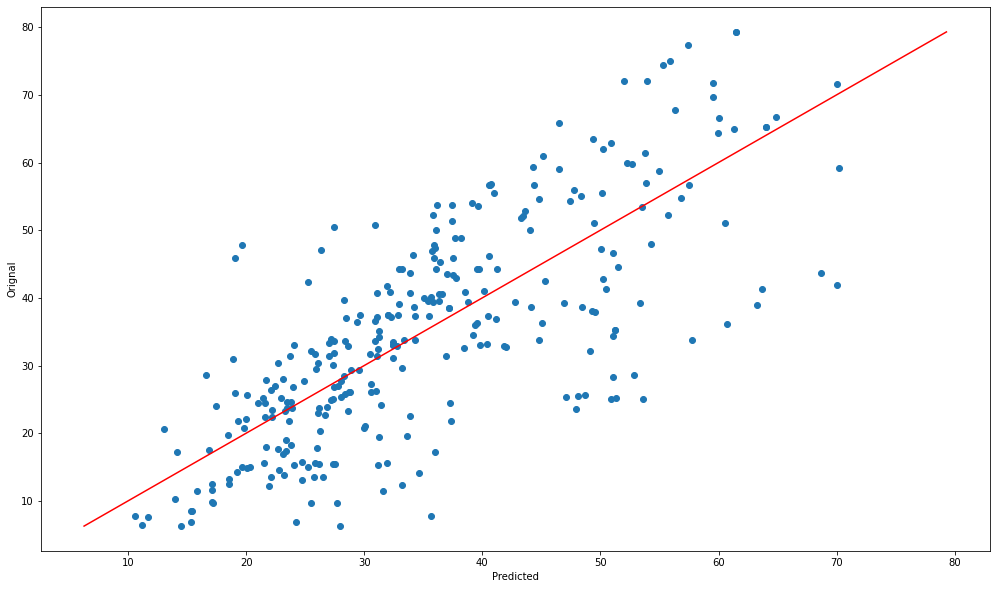

In [84]:
import matplotlib.pyplot as plt

#define figure size
fig = plt.figure(figsize=(17,10))

#produce scatter plots
plt.scatter(y_predict,true_y)
plt.plot([true_y.min(), true_y.max()], [true_y.min(), true_y.max()], color='red')
plt.xlabel('Predicted')
plt.ylabel('Orignal')
plt.show()

# Compare with the other models

### 1. model2
Create a new model by excluding the two ingridients which are Coarse Aggregate and Fine Aggregate that have the least effect on the target Compressive Strength.

In [85]:
#define explanatory variable
train_x2 = train[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Age']]

#fit linear regression model
lrmodel2 = sm.OLS(train_y, train_x2).fit() 

#view model summary
print(lrmodel2.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Compressive Strength   R-squared (uncentered):                   0.930
Model:                              OLS   Adj. R-squared (uncentered):              0.929
Method:                   Least Squares   F-statistic:                              1528.
Date:                  Sat, 29 Oct 2022   Prob (F-statistic):                        0.00
Time:                          14:35:13   Log-Likelihood:                         -2642.7
No. Observations:                   700   AIC:                                      5297.
Df Residuals:                       694   BIC:                                      5325.
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

The adjusted R-squared increased to about 93% and the accuracy of the model was also increased.

In [86]:
y_predict2 = lrmodel2.predict(test_x[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Age']])

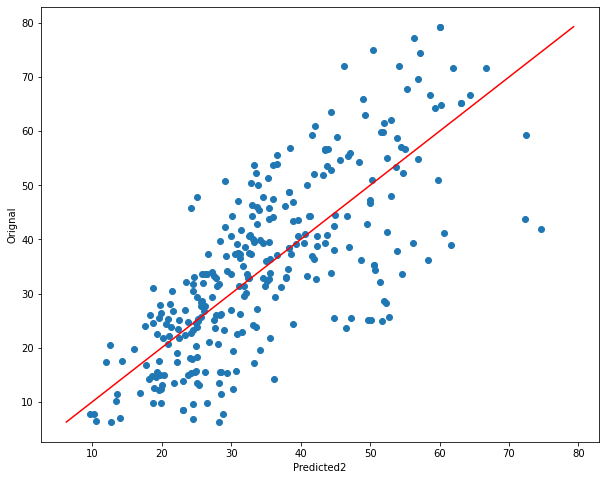

In [87]:
#define figure size
fig = plt.figure(figsize=(10,8))

#produce scatter plots
plt.scatter(y_predict2,true_y)
plt.plot([true_y.min(), true_y.max()], [true_y.min(), true_y.max()], color='red')
plt.xlabel('Predicted2')
plt.ylabel('Orignal')
plt.show()

### 2. model3
Create a third model excluding insignificant values with p-value of 0.05 or more which are Coarse Aggregate, Fine Aggregate and Superplasticizer and compare this model with previous models. 

In [88]:
#define explanatory variable
train_x3 = train[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Age']]

#fit linear regression model
lrmodel3 = sm.OLS(train_y, train_x3).fit() 

#view model summary
print(lrmodel3.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Compressive Strength   R-squared (uncentered):                   0.927
Model:                              OLS   Adj. R-squared (uncentered):              0.926
Method:                   Least Squares   F-statistic:                              1754.
Date:                  Sat, 29 Oct 2022   Prob (F-statistic):                        0.00
Time:                          14:35:14   Log-Likelihood:                         -2657.4
No. Observations:                   700   AIC:                                      5325.
Df Residuals:                       695   BIC:                                      5348.
Df Model:                             5                                                  
Covariance Type:              nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

Although the accuracy was significantly increased compared to the first model, the adjusted R-squared decreased a little when compared with the second model which has superplasticizer. Through this, it can be seen that the superplasticizer has some effect on the target and model as well.

In [89]:
y_predict3 = lrmodel3.predict(test_x[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Age']])

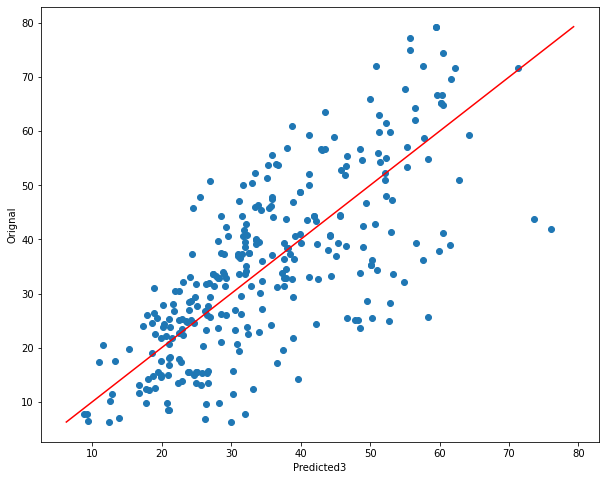

In [91]:
#define figure size
fig = plt.figure(figsize=(10,8))

#produce scatter plots
plt.scatter(y_predict3,true_y)
plt.plot([true_y.min(), true_y.max()], [true_y.min(), true_y.max()], color='red')
plt.xlabel('Predicted3')
plt.ylabel('Orignal')
plt.show()